In [0]:
def chop_img(data_type, path_df, margin = 15):
  """
     ex) chip_img('trian', train_df, margin = 20)
     
     data_type = train or test as string         
     path_df = train_df or test_df,
     marging = how many pixel left over 
     
     this function create directory as data_type_chopping """
  
  if f'{data_type}_chopping' in os.listdir('/content/'):
    os.removedirs(f'{data_type}_chopping')
  else:
    os.mkdir(f'{data_type}_chopping')                                            # make directory
    
  for i in range(len(path_df.img_file)):
    img = cv2.imread(f'/content/{data_type}/{path_df.iloc[i, 0]}')               # load image

    crop_img = img[path_df.iloc[i, 2] - margin: path_df.iloc[i, 4] + margin,     # y : y + h
                   path_df.iloc[i,1] - margin : path_df.iloc[i, 4]] + margin     # x : x + w

    cv2.imwrite(f'/content/{data_type}_chopping/{path_df.iloc[i,0]}', crop_img)  # save the image

using bounding box

In [0]:
!mkdir train
!cp train.zip train/
!unzip train/train.zip -d train

!mkdir test
!cp test.zip test/
!rm train.zip test.zip
!unzip test/test.zip -d test
!rm train/train.zip
!rm test/test.zip

In [0]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image

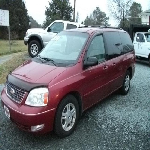

In [6]:
image.load_img('/content/train/train_00001.jpg', target_size=(150,150))

In [0]:
train_df = pd.read_csv('/content/train.csv')

In [12]:
train_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,train_00001.jpg,1,80,641,461,108
1,train_00002.jpg,57,53,293,236,71
2,train_00003.jpg,35,42,227,160,76
3,train_00004.jpg,10,21,254,165,188
4,train_00005.jpg,1,67,772,573,44


In [0]:
img = cv2.imread('/content/train/train_00001.jpg')
img

In [25]:
print(f'/content/train/{train_df.iloc[0, 0]}')

/content/train/train_00001.jpg


In [33]:
img = cv2.imread(f'/content/train/{train_df.iloc[0, 0]}')  # load image

 
crop_img = img[train_df.iloc[0, 2]: train_df.iloc[0, 4], train_df.iloc[0,1] : train_df.iloc[0, 4]]  # crop imag

cv2.imwrite(f'{train_df.iloc[0,0]}', crop_img) # save the image

True

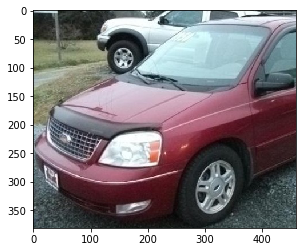

In [31]:
img_cropped = plt.imread('test_crop.jpg')
plt.imshow(img_cropped)

iterate whole train file

In [36]:
train_df.shape

(10016, 6)

In [0]:
import os 

In [0]:
os.mkdir('train_chop')

In [0]:
for i in range(len(train_df.img_file)):
  img = cv2.imread(f'/content/train/{train_df.iloc[i, 0]}')  # load image

  crop_img = img[train_df.iloc[i, 2]: train_df.iloc[i, 4],  # y : y + h
                 train_df.iloc[i,1] : train_df.iloc[i, 4]]  # x : x + w

  cv2.imwrite(f'/content/train_chop/{train_df.iloc[i,0]}', crop_img) # save the image
  
  print(len(os.listdir('/content/train_chop')))
  

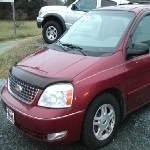

In [42]:
image.load_img('/content/train_chop/train_00001.jpg', target_size=(150,150))

In [45]:
data_types = 'train'
print(f'/content/{data_types}_chop/')

/content/train_chop/


In [46]:
os.listdir('/content/')

['.config',
 '.ipynb_checkpoints',
 'class.csv',
 'test.csv',
 'test',
 'sample_submission.csv',
 'train',
 'train.csv',
 'train_chop',
 'drive',
 'sample_data']

In [0]:
def chop_img(data_type, path_df, margin = 15):
  """
     ex) chip_img('trian', train_df, margin = 20)
     
     data_type = train or test as string         
     path_df = train_df or test_df,
     marging = how many pixel left over 
     
     this function create directory as data_type_chopping """
  
  if f'{data_type}_chopping' in os.listdir('/content/'):
    os.removedirs(f'{data_type}_chopping')
  else:
    os.mkdir(f'{data_type}_chopping')
  for i in range(len(path_df.img_file)):
    img = cv2.imread(f'/content/{data_type}/{path_df.iloc[i, 0]}')  # load image

    crop_img = img[path_df.iloc[i, 2] - margin: path_df.iloc[i, 4] + margin,  # y : y + h
                   path_df.iloc[i,1] - margin : path_df.iloc[i, 4]] + margin # x : x + w

    cv2.imwrite(f'/content/{data_type}_chopping/{path_df.iloc[i,0]}', crop_img) # save the image



In [0]:
chop_img('train', path_df=train_df)